# Student Loans

A student loan is a type of financial aid that helps cover college expenses. Unlike scholarships or grants, student loans are borrowed money that must be repaid, typically with interest. Scholarships and grants, on the other hand, are free money that doesn't need to be repaid. To obtain a federal student loan, students must fill out the Free Application for Federal Student Aid (FAFSA), which collects financial information from students and/or their parents. This information is reviewed by the financial aid offices of the student’s chosen schools, which then send an “award letter” outlining the financial aid offer. This offer could include grants, scholarships, or student loans.

Private student loans are usually taken out after all federal aid options are exhausted. They require signing a promissory note, which is a legal document where the student agrees to repay the loan plus interest under certain terms.


## Types of Student Loans

#### Federal Student Loans:

- `Direct Subsidized Loans:` For undergraduates with financial need. The government pays interest while the student is in school.
- `Direct Unsubsidized Loans:` For undergraduates and graduates, not based on financial need. The student is responsible for all interest.
- `Direct PLUS Loans:` For graduate students or parents of undergrads. Requires a separate application and credit check.
- `Direct Consolidation Loans:` Combine multiple federal loans into one, potentially lowering monthly payments but extending the loan period.

#### Private Student Loans 
Offered by banks, credit unions, or other lenders. Typically have higher interest rates and may require repayment while still in school.



## How Student Loan Interest Works
Interest is the percentage charged on the loan balance for borrowing money. Federal loan interest rates are typically fixed, while private loan interest rates can vary based on credit rating and can be fixed or variable. For federal loans in the 2023–2024 school year:

- `Direct Subsidized/Unsubsidized (Undergrad):` 5.50%
- `Direct Unsubsidized (Graduate):` 7.05%
- `Direct PLUS Loans:` 8.05%

When payments are made, they are applied to the interest first and then the loan principal. Interest can be capitalized, meaning unpaid interest is added to the principal, causing the loan balance to grow over time.

## Student Loan Interest Rates, Components and Risk Factors

When financing higher education, private student loans are often needed to bridge the gap between available resources and tuition costs. A key factor influencing the total cost of borrowing is the interest rate, which is affected by multiple components and risk factors.

### Key Components of Interest Rates

##### Base Rate (e.g., Central Bank Rate)
The base rate is the foundational interest rate set by the central bank (such as the Federal Reserve in the U.S.). This rate influences the overall borrowing costs and serves as a benchmark for private loan interest rates. A rise in the base rate typically leads to higher borrowing costs for consumers.

##### Inflation Premium
Lenders add an inflation premium to the interest rate to offset the decrease in purchasing power over time. If inflation is expected to rise, this premium ensures that lenders are compensated for the diminished value of the money they will receive in the future.

##### Credit Risk Premium
The credit risk premium reflects the likelihood of the borrower defaulting on the loan. Lenders evaluate a borrower’s credit history, income, and debt-to-income ratio. Borrowers with poor credit or unstable income face higher interest rates due to the greater risk involved.

##### Liquidity Premium
Loans that are more difficult to sell or convert into cash carry a liquidity premium. Lenders charge higher interest rates on loans that may not be easily tradable, reflecting the higher risk and effort involved in holding such loans.

##### Administrative Costs
The cost of processing and managing loans is passed on to borrowers in the form of a higher interest rate. These include underwriting, legal, and servicing fees associated with loan maintenance.

##### Profit Margin
Lenders add a margin to ensure profitability. This margin compensates them for the risks they take and guarantees a return on investment. The profit margin may fluctuate based on competition and market conditions.


## Risk Factors Considered for Setting Interest Rates

##### Credit Risk:
Credit risk is the possibility that a borrower will default on their loan. Lenders quantify this risk by analyzing credit scores, payment history, and income stability. The higher the credit risk, the higher the interest rate imposed to mitigate potential losses.

##### Market Risk:
This risk arises from fluctuations in broader economic conditions, such as changes in interest rates, inflation, or recession. Lenders incorporate market risk by adjusting interest rates based on current economic trends and forecasts.

##### Operational Risk:
This refers to the risk of loss due to failures in internal processes, systems, or external events. While not as directly influential as credit risk, operational risk factors may lead to adjustments in loan terms or fees.

##### Legal and Regulatory Risk:
Legal or regulatory changes can impact loan agreements or interest rates. Lenders consider the likelihood of future legal or regulatory developments, especially those that could limit their ability to recover funds or impose penalties.

##### Country Risk:
For international students or borrowers residing in politically or economically unstable countries, lenders incorporate country risk into the interest rate. This risk reflects the uncertainty of operating in a particular jurisdiction and accounts for factors like currency fluctuations and government stability.

The base rate sets the foundation for the loan, with premiums like inflation and credit risk layered on top to reflect the borrower’s profile and economic conditions. Market risk influences fluctuations in both fixed and variable interest rates, while liquidity premium and administrative costs ensure lenders cover operational expenses and potential illiquidity. The risk components, especially credit risk and country risk, are quantified through credit scores, income analysis, and geopolitical assessments, ensuring that lenders price loans appropriately to protect themselves against default or instability.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

- `payment_history:` The individual's loan payment history.
- `location_parameter:` Geographic location factor related to the student or institution.
- `stem_degree_score:` Indicates if the student is pursuing a STEM (Science, Technology, Engineering, Mathematics) degree.
- `gpa_ranking:` The student's GPA ranking compared to their peers.
- `alumni_success:` Measure of alumni success, typically based on employment or income after graduation.
- `study_major_code:` Code representing the student's major or field of study.
- `time_to_completion:` Estimated time for the student to complete their academic program.
- `finance_workshop_score:` Score representing the student's performance in financial literacy workshops.
- `cohort_ranking:` The student’s ranking within their academic cohort.
- `total_loan_score:` A score based on the total amount of loans the student has taken.
- `financial_aid_score:` A measure of the financial aid received by the student.
- `credit_ranking:` The student’s credit ranking based on their loan and financial history.

#### In the DataProcessor class we will be managing and preparing a dataset for ML tasks. It includes methods for loading data, handling missing values, detecting and removing outliers, splitting the dataset into training and testing sets, and visualizing a correlation matrix.

In [2]:
class DataProcessor:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.y_train = None
        self.y_test = None
    
    def load_data(self):
        # Leer y mostrar información del CSV
        self.data = pd.read_csv(self.file_path)
        print("\nEstadísticas descriptivas del dataframe:")
        print(self.data.describe())

    def handle_missing_values(self):
        # Manejar valores faltantes en el dataset
        self.data.fillna(self.data.mean(), inplace=True)
        print("\nValores faltantes han sido tratados.")

    def handle_outliers(self):
        # Manejar valores atípicos (outliers)
        Q1 = self.data.quantile(0.25)
        Q3 = self.data.quantile(0.75)
        IQR = Q3 - Q1
        self.data = self.data[~((self.data < (Q1 - 1.5 * IQR)) | (self.data > (Q3 + 1.5 * IQR))).any(axis=1)]
        print("\nValores atípicos han sido eliminados.")

    def prepare_data(self, target_column, test_size=0.2):
        # Preparar los datos, escalar y dividir en entrenamiento/prueba
        X = self.data.drop(columns=target_column)
        y = self.data[target_column]
        
        # División en conjuntos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
        
        # Escalar los datos
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(X_train)
        self.X_test_scaled = scaler.transform(X_test)
        self.y_train = y_train
        self.y_test = y_test

    def show_correlation_matrix(self):
        # Mostrar la matriz de correlación
        correlation_matrix = self.data.corr()
        plt.figure(figsize=(10,8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()
        
    def evaluate_logistic_regression(self):
        # Inicializar y entrenar el modelo de Regresión Logística
        model = LogisticRegression(max_iter=1000)
        model.fit(self.X_train_scaled, self.y_train)

        # Predicciones en el conjunto de prueba
        y_pred = model.predict(self.X_test_scaled)

        # Calcular y mostrar la precisión del modelo
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Accuracy del modelo de Regresión Logística: {accuracy:.2f}")

        # Generar y mostrar la matriz de confusión
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm', 
                    xticklabels=['Class 0', 'Class 1'],  # Replace with actual class labels
                    yticklabels=['Class 0', 'Class 1'])
        plt.title('Confusion Matrix for Logistic Regression')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

#### In CreditModel´s class we are training a ML model, specifically a Random Forest Classifier, to make predictions on the processed dataset. It includes methods for training the model and evaluating its performance through various metrics such as accuracy, classification report and a confusion matrix.

In [3]:
class CreditModel:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100,random_state=42)
    
    def train(self, X_train, y_train):
        # Entrenar el modelo con los datos de entrenamiento
        self.model.fit(X_train, y_train)
    
    def evaluate(self, X_test, y_test):
        # Evaluar el modelo y mostrar los resultados
        y_pred = self.model.predict(X_test)
        accuracy = self.model.score(X_test, y_test)
        print(f"\nAccuracy del modelo: {accuracy}")
        print("\nInforme de clasificación:")
        print(classification_report(y_test, y_pred))
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm',
                    xticklabels=['Not Converted', 'Converted'],
                    yticklabels=['Not Converted', 'Converted'])
        plt.title('Confusion Matrix for Test Data')
        plt.ylabel('Actual Values')
        plt.xlabel('Predictive Values')
        plt.show()

In [4]:
class CreditModel:
    def __init__(self, model_type='random_forest'):
        """
        Initialize the CreditModel with the chosen machine learning model.
        """
        self.model_type = model_type  # Store model type as an attribute
        if model_type == 'random_forest':
            self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        elif model_type == 'knn':
            self.model = KNeighborsClassifier(n_neighbors=5)
        elif model_type == 'gradient_boosting':
            self.model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        else:
            raise ValueError("Invalid model_type. Choose from 'random_forest', 'knn', 'gradient_boosting'")
    
    def train(self, X_train, y_train):
        """Train the model using the training data."""
        self.model.fit(X_train, y_train)
    
    def evaluate(self, X_test, y_test):
        """Evaluate the model on the test data and display results."""
        y_pred = self.model.predict(X_test)
        
        # Calculate and display accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nAccuracy of the model: {accuracy:.2f}")
        
        # Display classification report
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Conditional display of confusion matrix
        if self.model_type == 'random_forest':
            # Generate and display confusion matrix for Random Forest
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
            plt.title(f'Confusion Matrix for {self.model.__class__.__name__}')
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')
            plt.show()
        elif self.model_type == 'knn':
            print('No confusion matrix displayed.')
        elif self.model_type == 'gradient_boosting':
            print('No confusion matrix displayed.')

In [5]:
data = pd.read_csv('student-loans.csv')
data.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### First, we will be creating an instance from DataProcessor and manage the missing and atypycal values

In [6]:
# Crear una instancia de DataProcessor y cargar los datos
data_processor = DataProcessor(file_path='student-loans.csv')
data_processor.load_data()

# Manejo de valores faltantes y atípicos
data_processor.handle_missing_values()
data_processor.handle_outliers()


Estadísticas descriptivas del dataframe:
       payment_history  location_parameter  stem_degree_score  gpa_ranking  \
count      1599.000000         1599.000000        1599.000000  1599.000000   
mean          8.319637            0.527821           0.270976     2.538806   
std           1.741096            0.179060           0.194801     1.409928   
min           4.600000            0.120000           0.000000     0.900000   
25%           7.100000            0.390000           0.090000     1.900000   
50%           7.900000            0.520000           0.260000     2.200000   
75%           9.200000            0.640000           0.420000     2.600000   
max          15.900000            1.580000           1.000000    15.500000   

       alumni_success  study_major_code  time_to_completion  \
count     1599.000000       1599.000000         1599.000000   
mean         0.087467         15.874922           46.467792   
std          0.047065         10.460157           32.895324   
min

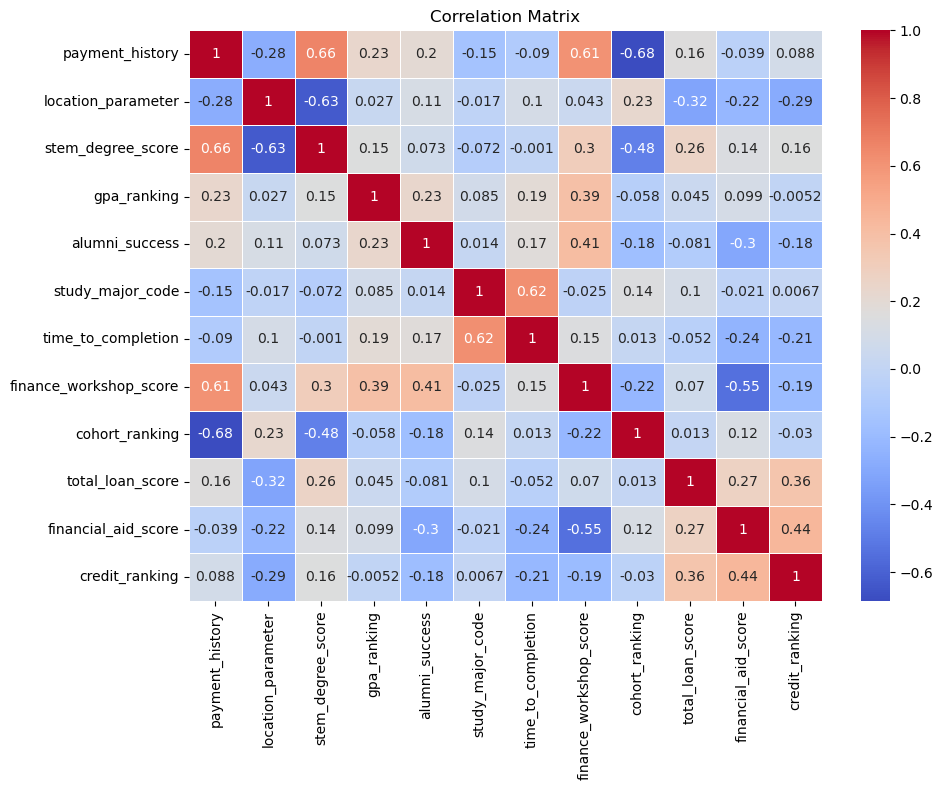

In [7]:
# Mostrar la matriz de correlación
data_processor.show_correlation_matrix()

Accuracy of Logistic Regression Model: 0.78


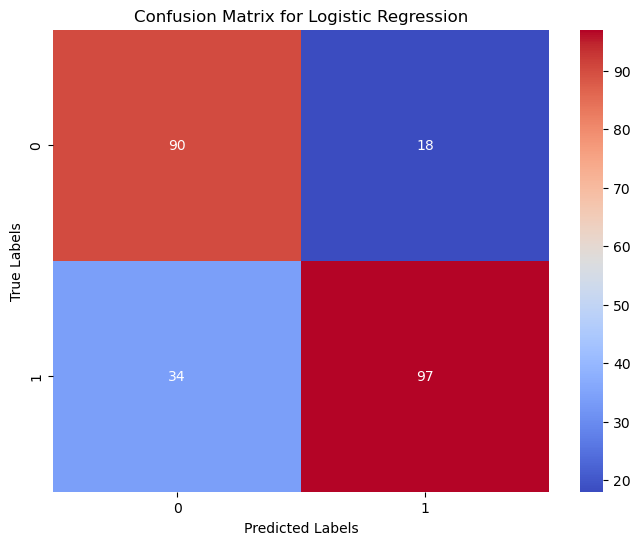

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       108
           1       0.84      0.74      0.79       131

    accuracy                           0.78       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.78      0.78       239



In [8]:
data_processor.prepare_data(target_column='credit_ranking')

# Logistic Regression Model
# Train and evaluate Logistic Regression after scaling
model = LogisticRegression(max_iter=1000)
model.fit(data_processor.X_train_scaled, data_processor.y_train)

# Make predictions on the test set
y_pred = model.predict(data_processor.X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(data_processor.y_test, y_pred)
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}")

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(data_processor.y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='coolwarm')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Optional: Display detailed classification report
print("Classification Report:")
print(classification_report(data_processor.y_test, y_pred))

In [9]:
# Example 2: Using K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors Model Evaluation:")
knn_model = CreditModel(model_type='knn')
knn_model.train(data_processor.X_train_scaled, data_processor.y_train)
knn_model.evaluate(data_processor.X_test_scaled, data_processor.y_test)

K-Nearest Neighbors Model Evaluation:

Accuracy of the model: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       108
           1       0.75      0.79      0.77       131

    accuracy                           0.74       239
   macro avg       0.73      0.73      0.73       239
weighted avg       0.74      0.74      0.74       239

No confusion matrix displayed.


In [10]:
# Example 3: Using Gradient Boosting
print("Gradient Boosting Model Evaluation:")
gb_model = CreditModel(model_type='gradient_boosting')
gb_model.train(data_processor.X_train_scaled, data_processor.y_train)
gb_model.evaluate(data_processor.X_test_scaled, data_processor.y_test)

Gradient Boosting Model Evaluation:

Accuracy of the model: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       108
           1       0.79      0.76      0.78       131

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239

No confusion matrix displayed.


Random Forest Model Evaluation:

Accuracy of the model: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.79       108
           1       0.84      0.78      0.81       131

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



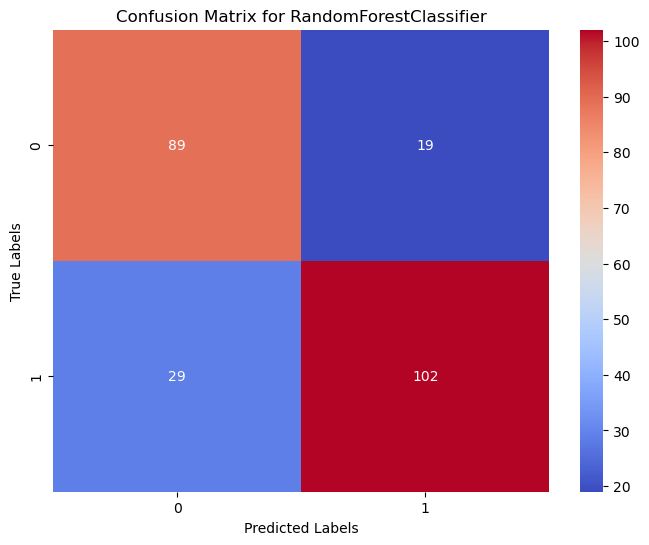

In [11]:
# Random Forest
print("Random Forest Model Evaluation:")
rf_model = CreditModel(model_type='random_forest')
rf_model.train(data_processor.X_train_scaled, data_processor.y_train)
rf_model.evaluate(data_processor.X_test_scaled, data_processor.y_test)